# Assignment 2

* <b>Do not change the structure</b> of the notebook, only fill in the parts where your code needs to be filled in.

---

* Read carefully if the assignment asks for a Pandas **dataframe** or a Pandas **series**.

--- 

* For your notebook, <b>use as filename</b> `assignment02_vunetID.ipynb`, where `vunetID` is your three letter, three digit VU ID.

In [1]:
# read neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 20
np.set_printoptions(precision = 4, suppress = True)

### Customer database
Given is a table *orders* with product orders, and a table *customers* with customer info. **Merge** these two tables into a single DataFrame so that only orders **with** corresponding customer information remain. Assign this final DataFrame to `sales`.

In [2]:
orders = pd.DataFrame({'OrderID' : [1, 2, 3, 4, 5, 6, 7],
                       'CustID' : [1, 4, 3, 4, 1, 4, 5], 
                       'Amount' : [23.20, 2.30, 12.93, 54.92, 6.12, 9.60, 70.56]})

customers = pd.DataFrame({'ID' : [1, 2, 3, 4, 6], 
                          'First' : ["Henk", "Petra", "Sjoerd", "Mieke", "Sandjai"], 
                          'Last' : ["Janssen", "de Klomp", "Vermeulen", "Sterk", "Bhulai"],
                          'City' : ["Amsterdam", "Nijmegen", "Maastricht", "Amsterdam", "Diemen"]})

sales = pd.merge(orders, customers, left_on='CustID', right_on='ID', how='inner')

In [3]:
display(sales)

,OrderID,CustID,Amount,ID,First,Last,City
0,1,1,23.20,1,Henk,Janssen,Amsterdam
1,2,4,2.30,4,Mieke,Sterk,Amsterdam
2,3,3,12.93,3,Sjoerd,Vermeulen,Maastricht
3,4,4,54.92,4,Mieke,Sterk,Amsterdam
4,5,1,6.12,1,Henk,Janssen,Amsterdam
5,6,4,9.60,4,Mieke,Sterk,Amsterdam


The customer ID of "Sandjai Bhulai" is incorrect: it should be `5` instead of `6`. **Fix** this in the customer table. Then **re-merge** so that the orders match the corrected ID. After that, **group** the resulting merged table by `City` and **sum** the sales (`Amount`) per city. Assign this resulting series to `sales_per_city`.

In [4]:
customers.loc[customers['Last'] == "Bhulai", 'ID'] = 5
sales2_0 = pd.merge(orders, customers, left_on='CustID', right_on='ID', how='inner')
display(sales2_0)
salesCity = sales2_0.groupby(by = 'City')
sales_per_city = salesCity['Amount'].sum()

,OrderID,CustID,Amount,ID,First,Last,City
0,1,1,23.20,1,Henk,Janssen,Amsterdam
1,2,4,2.30,4,Mieke,Sterk,Amsterdam
2,3,3,12.93,3,Sjoerd,Vermeulen,Maastricht
3,4,4,54.92,4,Mieke,Sterk,Amsterdam
4,5,1,6.12,1,Henk,Janssen,Amsterdam
5,6,4,9.60,4,Mieke,Sterk,Amsterdam
6,7,5,70.56,5,Sandjai,Bhulai,Diemen


In [5]:
print(sales_per_city, "\n")
print(type(sales_per_city))

City
Amsterdam     96.14
Diemen        70.56
Maastricht    12.93
Name: Amount, dtype: float64 

<class 'pandas.core.series.Series'>


From the corrected sales dataframe (after fixing the ID), create a new dataframe with two columns:  
- The first column should be `First` (the first name).  
- The second column should be `Amount` (the sales amount).  

Assign this new dataframe to `new_sales`. Then, compute the total sales per person (grouping by `First`) and store that data in `person`. Finally, create a **bar plot** of these totals, showing each person's first name on the x-axis and total sales on the y-axis.

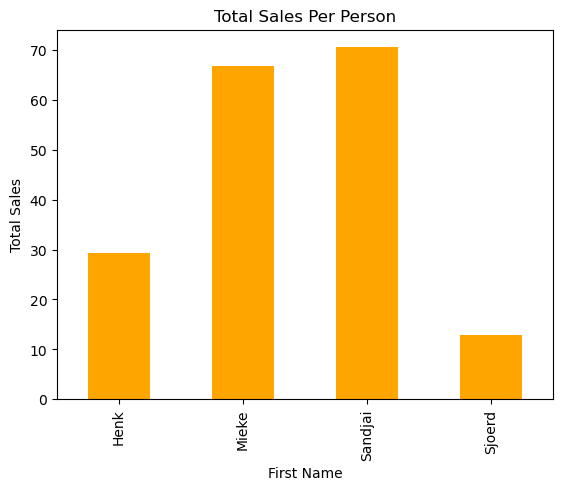

In [6]:
new_sales = sales2_0[['First', 'Amount']]
new_salesFirst = new_sales.groupby(by = 'First')
person = new_salesFirst['Amount'].sum()
person.plot(kind='bar', color='orange', title='Total Sales Per Person', ylabel='Total Sales', xlabel='First Name')
plt.show()


In [7]:
display(new_sales)

,First,Amount
0,Henk,23.20
1,Mieke,2.30
2,Sjoerd,12.93
3,Mieke,54.92
4,Henk,6.12
5,Mieke,9.60
6,Sandjai,70.56


### Course grades
Below is a string of text that combines course names and their grades without a clear delimiter (e.g., `"Data_wrangling8.5"`). Use a regular expression to capture the numerical grades from this text. Convert them to floating-point numbers and then compute the **average** of these grades. **Assign** the final average to the variable `avg_grade`.

In [8]:
import re
text = """Data_wrangling8.5
Machine_learning9.0
Advanced_machine_learning8.0
Reinforcement_learning7.5
"""

pattern = r'\d+\.\d+'

regex = re.compile(pattern, flags=re.IGNORECASE)
result = regex.findall(text)

grades = []
for grade in result:
    grades.append(float(grade))
avg_grade = sum(grades) / len(grades)

In [9]:
print(avg_grade)

8.25


### E-mail
Consider the below excerpt from an email. **Write a regular expression** that extracts three groups in the order: (sender, recipient, subject). Ensure each group matches the correct portion of the text.

Test your extraction by printing or otherwise verifying that you retrieved the correct elements.

In [10]:
import re
text = """From: Sandjai
To: the students following data wrangling
Subject: well done!
Body: I congratulate you all with mastering regular expressions.
It is a tough subject to learn. Good job.
"""

pattern = r"From:\s+([A-Z]+)\nTo:\s+([A-Z\s]+)\nSubject:\s+([A-Z\s!]+)\n"

regex = re.compile(pattern, flags=re.IGNORECASE)
result = regex.match(text).groups()

In [11]:
print('{} says "{}" to {}'.format(result[0], result[2], result[1]))

Sandjai says "well done!" to the students following data wrangling


### Orange juice
The file `oj.csv` has sales data (columns) for **three brands** of orange juice, across different weeks and different stores.

Determine which store number has the highest mean income (based on the column `INCOME`) and which store has the lowest mean income. **Assign** these store numbers to `max_store` and `min_store`, respectively.


In [12]:
oj = pd.read_csv('oj.csv')
storeGroup = oj.groupby(by = 'store')
meanPerStore = storeGroup['INCOME'].mean()
max_store = meanPerStore.idxmax()
min_store = meanPerStore.idxmin() 

In [13]:
print("Store number of highest mean income: {}".format(max_store))
print("Store number of lowest mean income : {}".format(min_store))

Store number of highest mean income: 62
Store number of lowest mean income : 75


Create a dataframe with **two rows** (one for `max_store` and one for `min_store`) and multiple columns representing each **week**. The values in each row should be the **sum** of `logmove` (sales) across all brands for the corresponding store and week. Assign this dataframe to `store_sales`. Plot these sum of sales (`logmove`) against the weeks (x-axis) to visualize the difference.

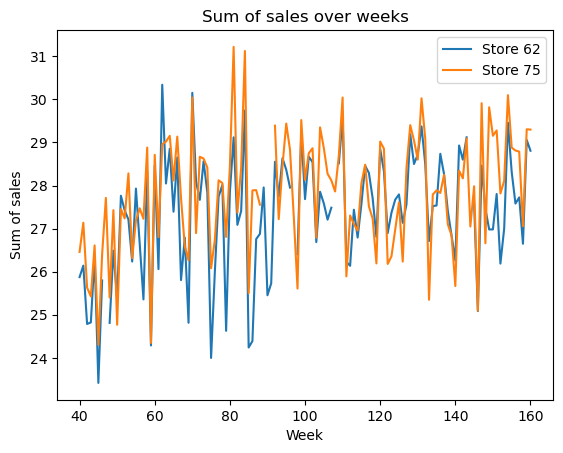

In [14]:
sales = oj.pivot_table(index = 'store', columns = 'week', values = 'logmove', aggfunc = 'sum')
store_sales = sales.loc[[max_store, min_store]]

for store, row in store_sales.iterrows():
    plt.plot(row.index, row.values, label = f"Store {store}")

plt.title("Sum of sales over weeks")
plt.xlabel("Week")
plt.ylabel("Sum of sales")
plt.legend()
plt.show()

In [15]:
display(store_sales)

week,40,41,42,43,44,45,46,47,48,49,...,151,152,153,154,155,156,157,158,159,160
store,,,,,,,,,,,,,,,,,,,,,
62,25.873865,26.140815,24.786000,24.821718,26.366941,23.416980,25.795976,NaN,24.811080,26.488769,...,27.803630,26.187457,27.000363,29.459849,28.314867,27.581363,27.724791,26.647964,29.057716,28.807921
75,26.458352,27.136543,25.629511,25.425159,26.609067,24.300114,26.399973,27.713414,25.398071,27.428784,...,29.279886,27.815632,28.107180,30.098233,28.880345,28.813151,28.787775,27.055508,29.305457,29.299517


The previous picture does not explain why the best store does better than the worst store. Let us study if the price influences the sales.

1. **Create** one DataFrame `oj1` that contains **only** the records (`price` and
`logmove`) for the `max_store`.
2. **Create** another DataFrame `oj2` that contains **only** the records (`price` and `logmove`) for the `min_store`.

We will fit simple linear models afterward to see how `logmove` depends on `price` in each store.

In [16]:
import statsmodels.api as sm

oj1 = oj[oj['store'] == max_store][['price', 'logmove']]
oj2 = oj[oj['store'] == min_store][['price', 'logmove']]

fit1 = sm.OLS(oj1['logmove'], sm.add_constant(oj1['price'])).fit()
fit2 = sm.OLS(oj2['logmove'], sm.add_constant(oj2['price'])).fit()

print(fit1.params)
print("---------")
print(fit2.params)

const    9.153937
price   -0.014614
dtype: float64
---------
const    10.876949
price    -0.672225
dtype: float64


In [17]:
display(oj1, oj2)

,price,logmove
8373,3.87,9.373819
8374,3.87,9.368369
8375,3.87,9.570529
8376,3.87,9.400630
8377,3.87,9.329367
...,...,...
8719,2.09,7.491088
8720,1.94,7.714231
8721,1.94,8.236421
8722,1.49,10.157820


,price,logmove
11490,3.87,8.971067
11491,3.87,8.392990
11492,3.87,9.018695
11493,3.87,8.624791
11494,3.87,8.476371
...,...,...
11839,1.97,8.528331
11840,1.94,8.868413
11841,1.68,9.510741
11842,1.49,10.806571


The previous analysis explains the difference between the two stores. The best store has almost no sensitivity to the price. The worst store has a high negative sensitivity to the price. Hence, the best store can charge higher prices than the worst store.

Let us now see which brand is the most popular. **Group** the data by `brand` and sum up `logmove` for each brand. **Assign** this series to `brand_sales`.

In [18]:
brandGroup = oj.groupby(by = 'brand')
brand_sales = brandGroup['logmove'].sum()

In [19]:
print(brand_sales)

brand
dominicks      88527.943226
minute.maid    88937.517267
tropicana      87916.698522
Name: logmove, dtype: float64


The column `feat` indicates whether a given orange juice is on sale (promotion). **Create** a dataframe that shows **mean price** for each brand (`brand`) at each level of the `feat` indicator. The rows should be the brands, and the columns should represent the `feat` status (e.g., 0 or 1). Assign this dataframe to `featured`.

In [20]:
featured = oj.pivot_table(index = 'brand', columns = 'feat', values = 'price', aggfunc = 'mean')

In [21]:
display(featured)

feat,0,1
brand,,
dominicks,1.795460,1.563375
minute.maid,2.328877,2.024867
tropicana,2.966131,2.390817
